In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r"C:\Users\karth\Downloads\solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
df.shape

(2920, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [6]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [7]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
df.fillna(df.mean(),inplace=True)

In [9]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [23]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 2920, dtype: bool


In [24]:
df.drop_duplicates()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [32]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      33
average-pressure-(period)        90
power-generated                1529
dtype: int64

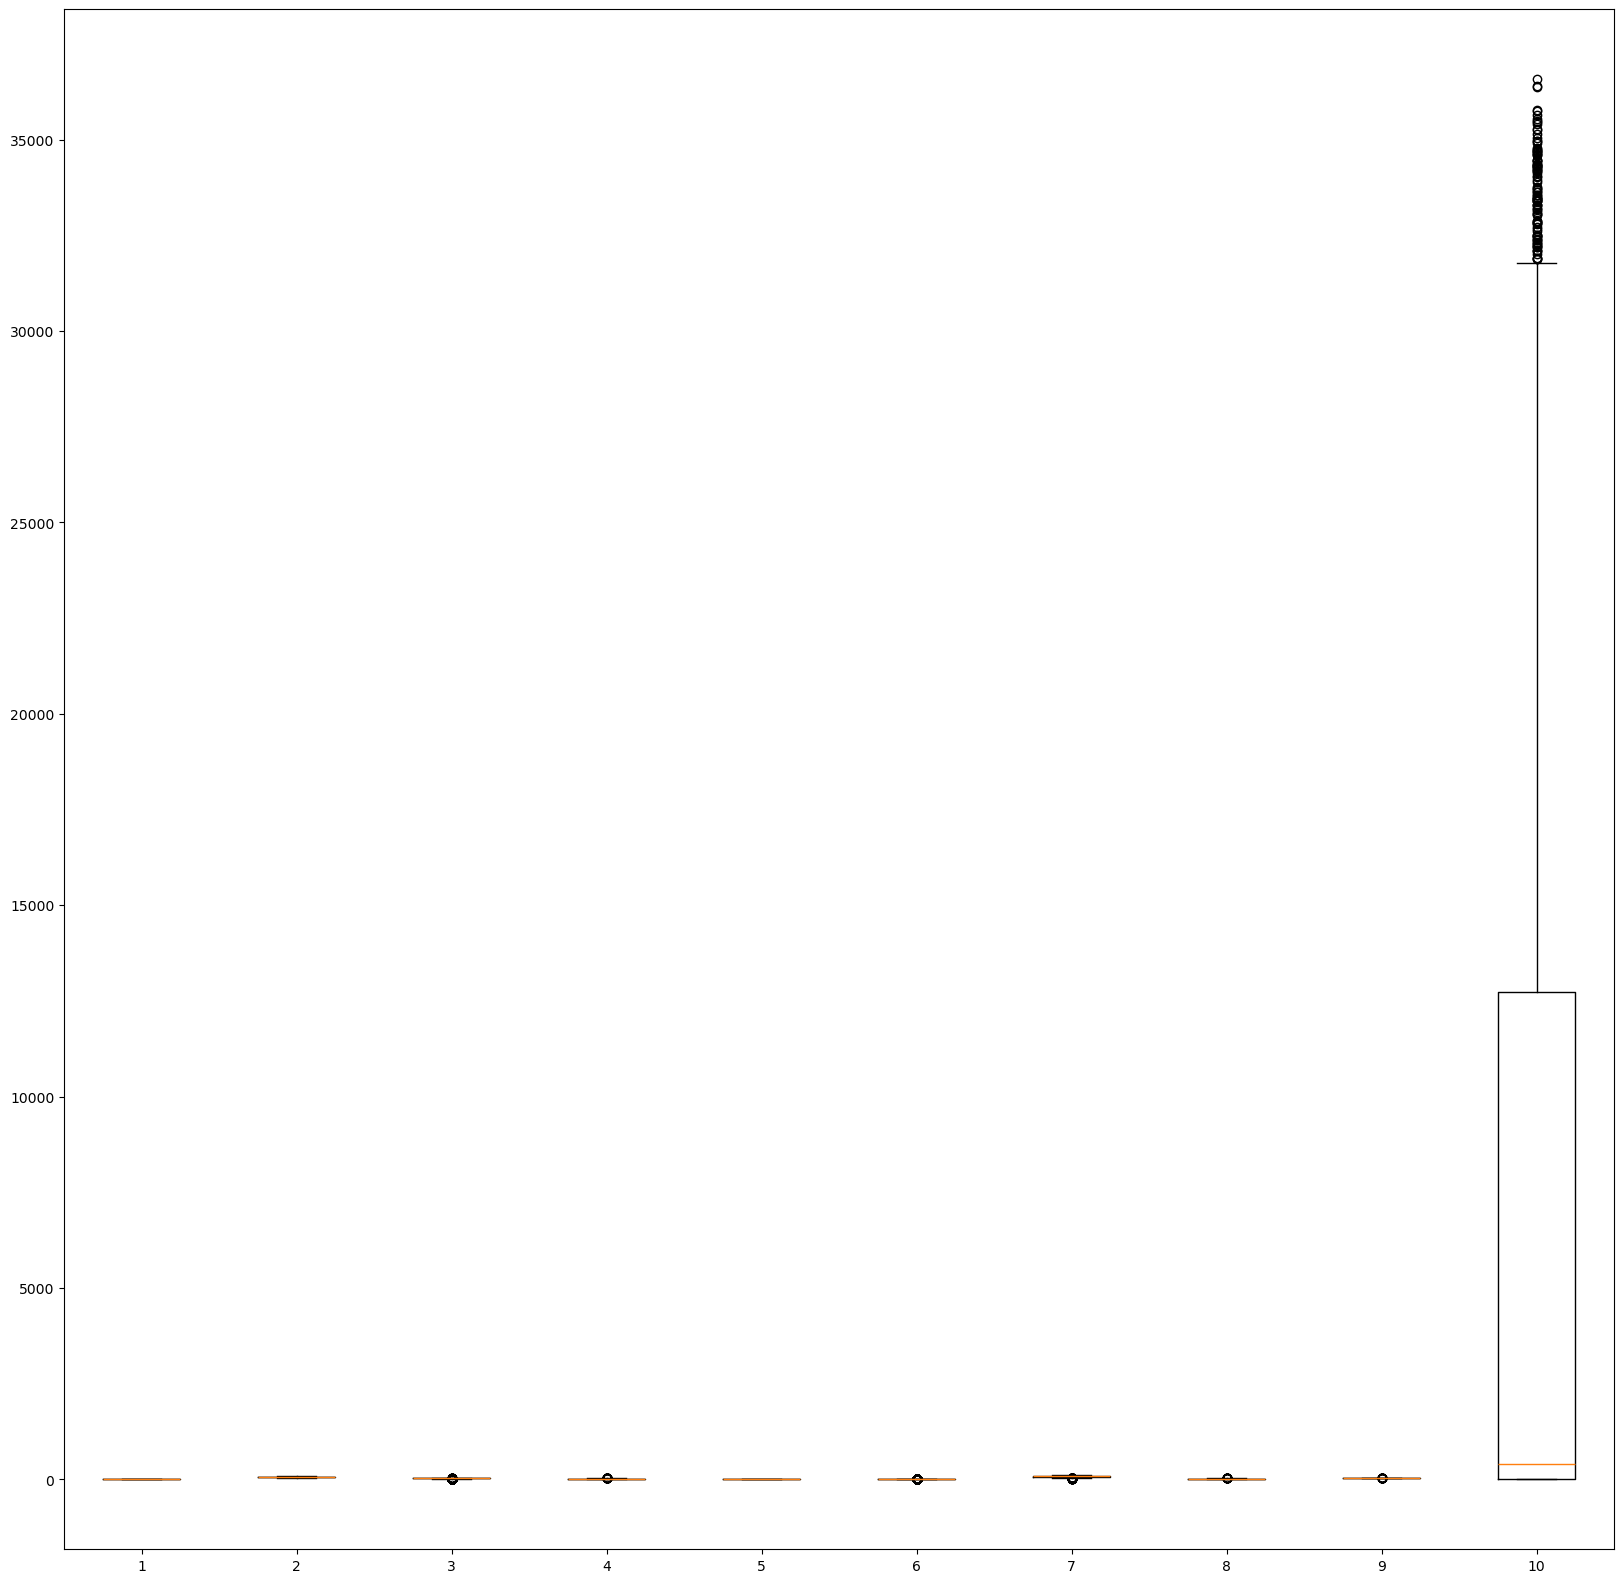

In [27]:
plt.figure(figsize=(20,20))
plt.boxplot(df)
plt.show()

In [33]:
df_num = df.select_dtypes(include='number')

# IQR outlier removal function
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filter rows that are within the IQR bounds
    return df[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply the function
df_cleaned = remove_outliers_iqr(df)

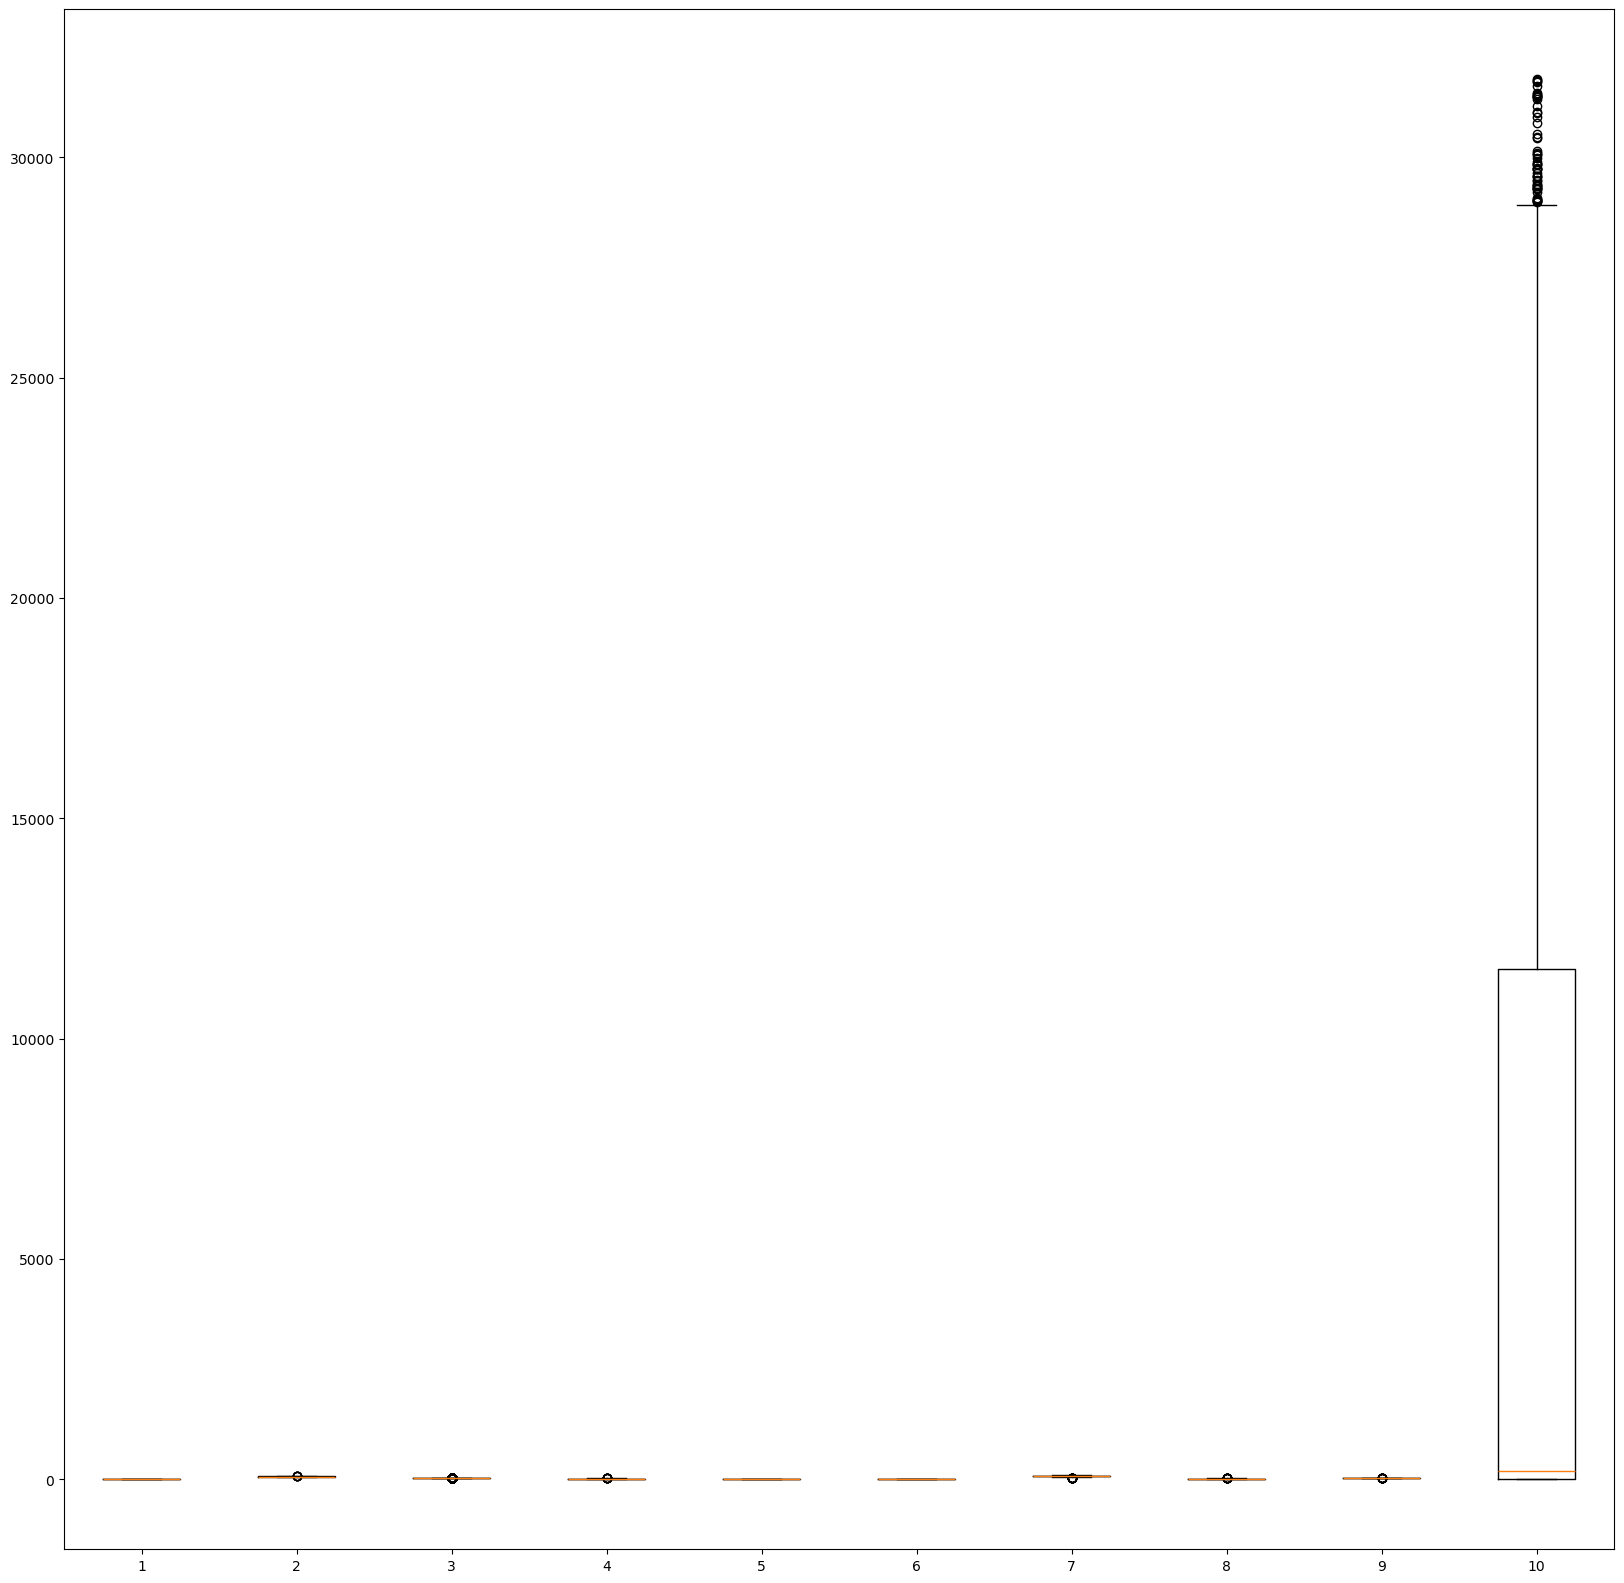

In [34]:
plt.figure(figsize=(20,20))
plt.boxplot(df_cleaned)
plt.show()

In [38]:
correlation=df_cleaned.corr(numeric_only=True)
correlation

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.130532,0.024641,-0.112608,-0.031873,NaN,0.454897,-0.187803,0.079485,-0.782419
temperature,-0.130532,1.000000,0.230827,-0.041691,-0.179781,NaN,-0.086151,-0.077413,-0.478628,0.075166
wind-direction,0.024641,0.230827,1.000000,-0.134501,-0.387030,NaN,-0.106244,-0.086496,-0.044173,0.059527
wind-speed,-0.112608,-0.041691,-0.134501,1.000000,0.137599,NaN,0.039838,0.592528,-0.225305,0.078539
sky-cover,-0.031873,-0.179781,-0.387030,0.137599,1.000000,NaN,0.306593,0.058164,0.019827,-0.117418
visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,0.454897,-0.086151,-0.106244,0.039838,0.306593,NaN,1.000000,-0.231167,0.031257,-0.568794
average-wind-speed-(period),-0.187803,-0.077413,-0.086496,0.592528,0.058164,NaN,-0.231167,1.000000,-0.163777,0.233787
average-pressure-(period),0.079485,-0.478628,-0.044173,-0.225305,0.019827,NaN,0.031257,-0.163777,1.000000,-0.003617
power-generated,-0.782419,0.075166,0.059527,0.078539,-0.117418,NaN,-0.568794,0.233787,-0.003617,1.000000


<Axes: >

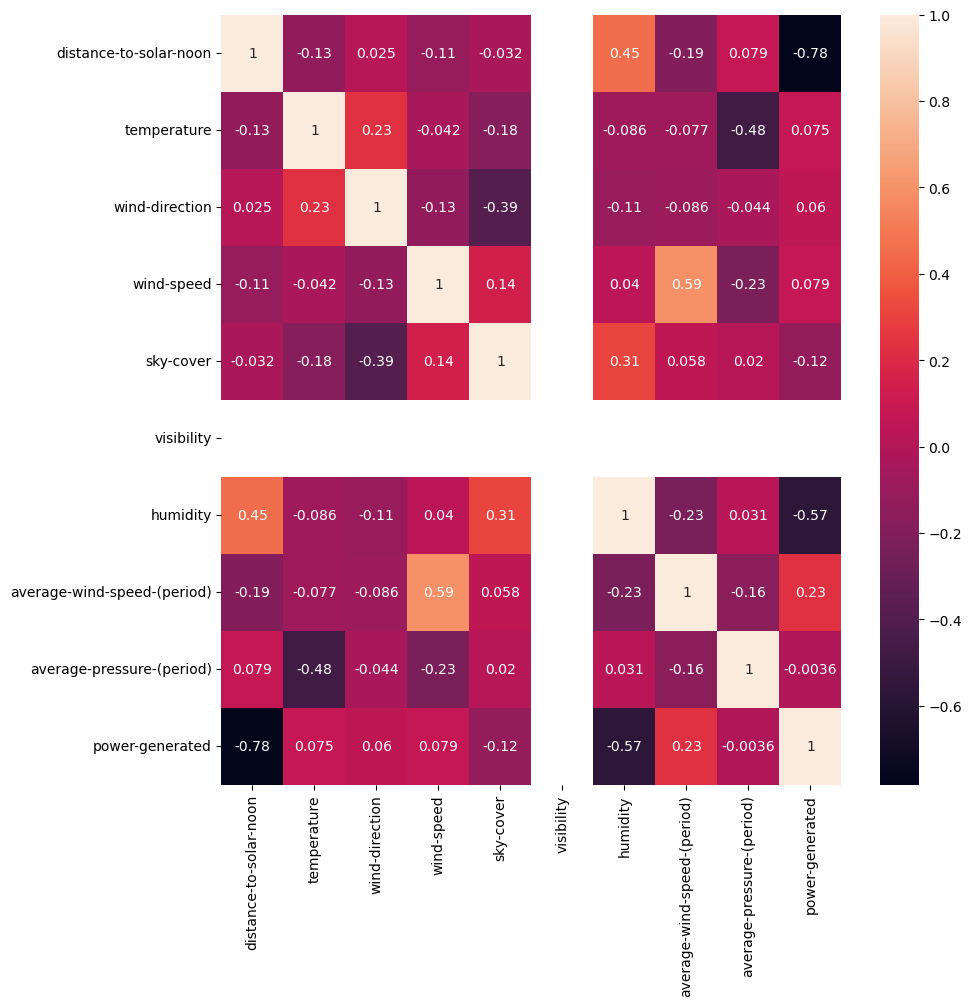

In [39]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

<Figure size 2000x2000 with 0 Axes>

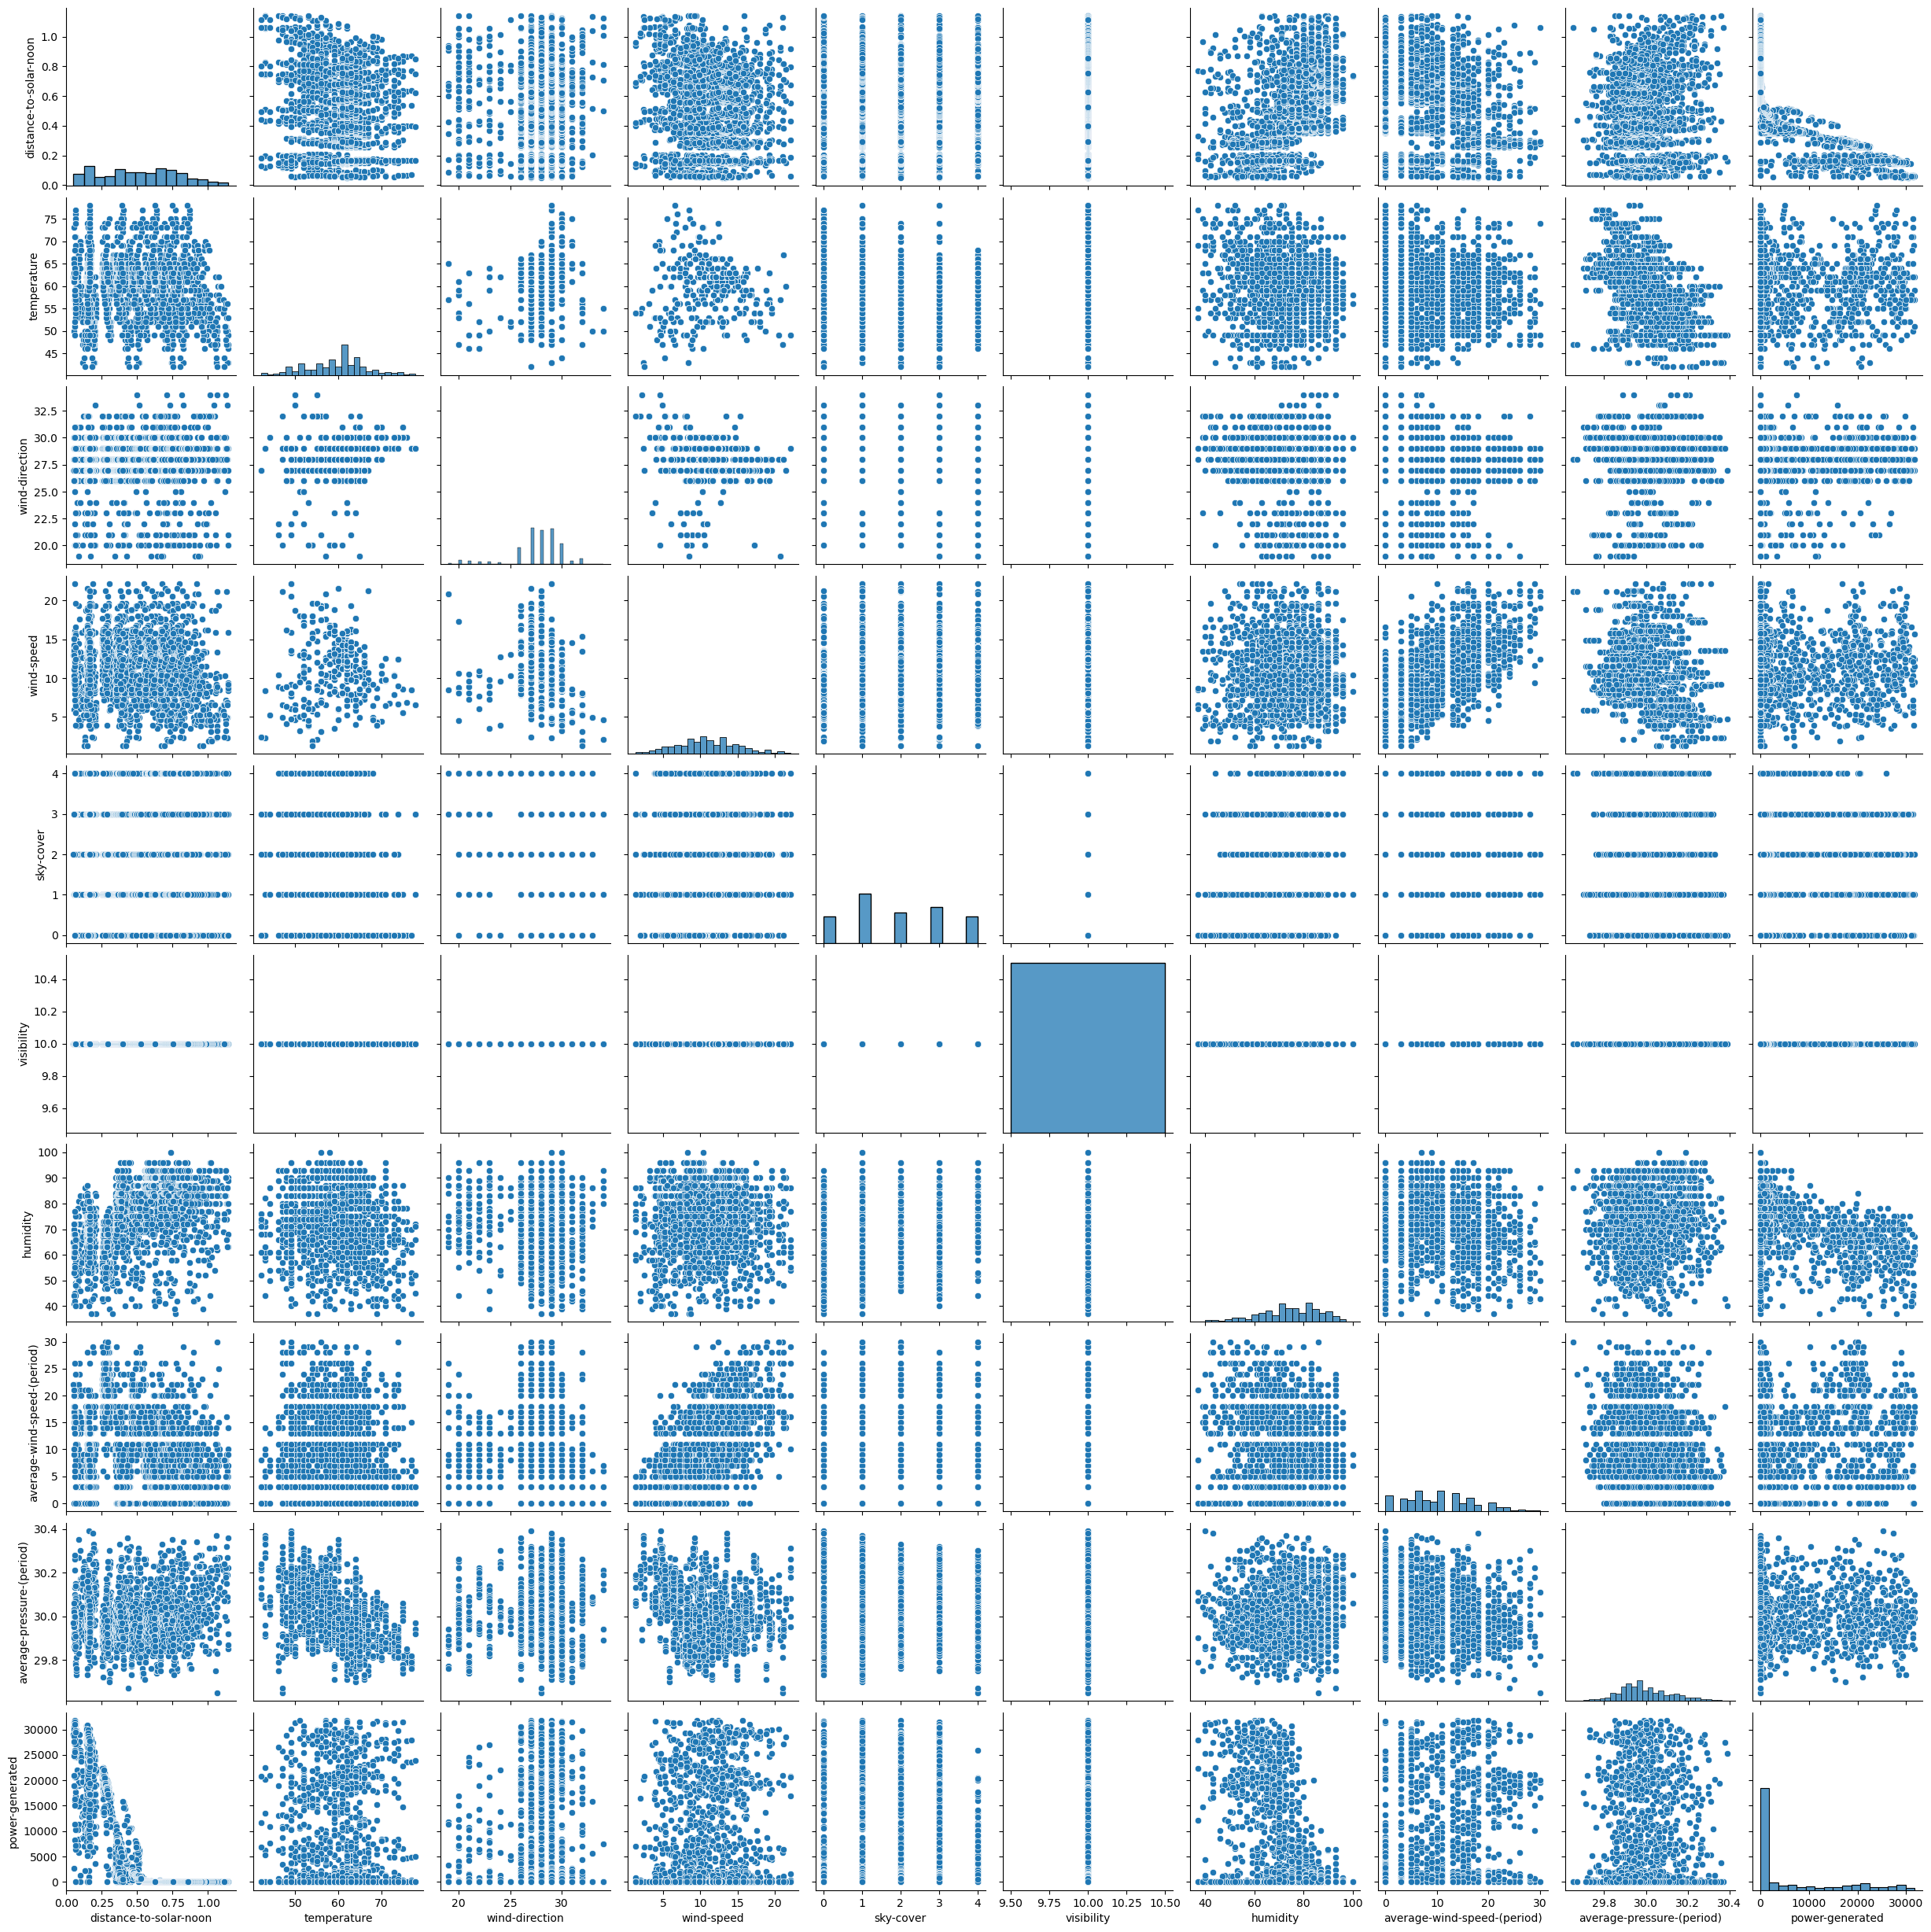

In [37]:
plt.figure(figsize=(20,20))
sns.pairplot(df_cleaned)

In [40]:
df_cleaned.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

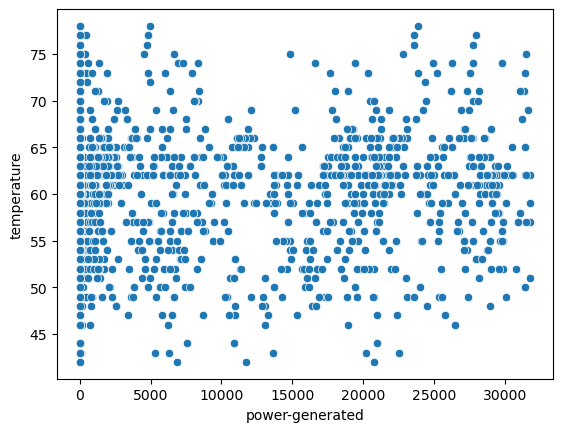

In [41]:
sns.scatterplot(x='power-generated',y='temperature',data=df_cleaned)
plt.show()

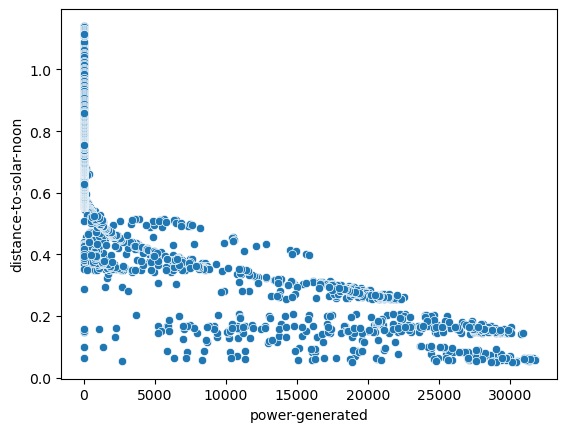

In [42]:
sns.scatterplot(x='power-generated',y='distance-to-solar-noon',data=df_cleaned)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=df_cleaned.drop(["power-generated"],axis=1)
x

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [47]:
y=df_cleaned["power-generated"]

In [48]:
y

0           0
1           0
2        5418
7           0
8           0
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power-generated, Length: 1891, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc=StandardScaler()

In [52]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [84]:
##random forest regressor -----
from sklearn.ensemble import RandomForestRegressor
fmodel=RandomForestRegressor(random_state=42)
fmodel.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
predict=fmodel.predict(x_test)

In [86]:
predict

array([2.176179e+04, 2.017910e+04, 2.696322e+04, 2.115960e+04,
       5.461780e+03, 0.000000e+00, 1.383580e+03, 0.000000e+00,
       1.895122e+04, 0.000000e+00, 1.437050e+03, 0.000000e+00,
       1.057220e+03, 1.780000e+00, 0.000000e+00, 3.440000e+00,
       0.000000e+00, 2.084323e+04, 0.000000e+00, 2.896153e+04,
       0.000000e+00, 0.000000e+00, 5.774720e+03, 3.240000e+01,
       2.248522e+04, 4.145200e+02, 4.200000e+00, 9.005000e+01,
       0.000000e+00, 0.000000e+00, 4.282760e+03, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.899630e+03, 1.315200e+03,
       1.080000e+01, 0.000000e+00, 3.812080e+03, 1.376550e+03,
       0.000000e+00, 9.120000e+00, 2.000000e-02, 9.378300e+02,
       1.937922e+04, 2.086239e+04, 1.348300e+03, 2.331284e+04,
       0.000000e+00, 2.032000e+01, 1.527990e+03, 1.414350e+03,
       0.000000e+00, 0.000000e+00, 1.650000e+00, 2.003792e+04,
       3.000000e-02, 3.000000e-01, 0.000000e+00, 2.046890e+03,
       0.000000e+00, 3.680000e+00, 1.450000e+01, 0.0000

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test,predict)

0.863310455080011

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_test,predict)

11527975.914805805

In [79]:
##linear Regression model#####
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
rmodel=lin_reg.fit(x_train,y_train)

In [80]:
predict=rmodel.predict(x_test)

In [81]:
predict

array([ 1.62017368e+04,  1.80414991e+04,  1.88718949e+04,  1.46047945e+04,
        8.47750242e+03, -1.01920770e+03,  4.87907467e+03,  1.75600919e+01,
        1.55806103e+04,  2.43605668e+03,  6.43993814e+03, -1.55363946e+03,
        4.82220112e+03, -1.44114922e+03, -3.93241572e+02,  1.40138838e+03,
        1.98189846e+03,  1.70163601e+04, -9.43580949e+03,  1.86129969e+04,
       -9.33752297e+02, -5.46071671e+03,  9.88495567e+03, -1.19738149e+03,
        1.79123751e+04,  4.33386448e+03,  5.68868048e+03,  2.87617044e+03,
       -5.32980148e+03,  2.24736950e+03,  7.68535151e+03, -1.44726750e+03,
       -7.30525163e+02,  2.94523007e+03,  7.50039244e+03,  7.27856263e+03,
        3.63226840e+03, -6.03901311e+02,  1.00739338e+04,  3.86110031e+03,
        1.96134316e+03, -4.80361366e+03,  3.44124183e+03,  4.40340855e+03,
        1.76246375e+04,  1.59580850e+04,  5.81349337e+03,  1.76043124e+04,
       -2.51003770e+03, -8.50211525e+02,  6.34643628e+03,  5.21904691e+03,
       -4.02101549e+02, -

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_test,predict)

0.6650359477201533

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mean_squared_error(y_test,predict)

28249838.195511755

In [67]:
!pip install xgboost

In [68]:
### Extreme Gradient Boosting model
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
predict=model.predict(x_test)

In [70]:
predict

array([ 2.30487109e+04,  2.11885059e+04,  2.86674805e+04,  1.98088477e+04,
        4.02234961e+03,  2.10468399e+02,  1.14557434e+03,  4.53325195e+01,
        1.84045742e+04,  7.89499283e+01,  1.59261719e+03, -5.86702652e+01,
        1.07323291e+03, -5.47540512e+01, -9.61530914e+01,  3.69219360e+01,
       -2.68675270e+01,  2.03758418e+04, -1.48093634e+01,  2.91161836e+04,
        4.81384277e+01,  7.48593903e+01,  6.75324658e+03,  2.89919281e+02,
        2.32413867e+04,  2.78103851e+02, -5.67562675e+00,  2.90172601e+00,
        4.52324295e+00, -4.31202820e+02,  4.66924170e+03, -1.57793732e+02,
        3.25300102e+01, -1.27520409e+02,  2.30850146e+03,  1.31118445e+03,
        2.66663971e+01, -3.21184349e+01,  5.74976318e+03,  1.37107666e+02,
        2.32178631e+01, -6.67359802e+02, -5.66610241e+00, -8.81391907e+01,
        1.61828291e+04,  2.15776445e+04,  1.03345972e+03,  2.26553516e+04,
       -4.42767220e+01,  5.02067184e+01,  1.84325366e+03,  1.27029602e+03,
        7.65058823e+01, -

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,predict)

0.8545559644699097

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mean_squared_error(y_test,predict)

12266301.0

In [75]:
import pickle

In [76]:
file='solar.pkl'

In [89]:
pickle.dump(fmodel,open(file,'wb'))